In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
players = pd.read_csv("players.csv")
salary = pd.read_csv("salaries.csv")

In [3]:
players.head()

,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0,70.1,256,13,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,06-Oct,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,06-Sep,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,07-Feb,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,06-Jan,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,06-Jun,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [4]:
salary.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


# Merging two different datasets using the player id to derive insights based on the salaries of players over the past NBA seasons. 

In [5]:
df= pd.merge(players,salary,left_on='player_id',right_on='player_id')

In [7]:
df.shape

(14163, 30)

In [8]:
df.nunique()

player_id       2408
birthDate       2235
birthPlace      1055
career_AST        88
career_FG%       344
career_FG3%      336
career_FT%       435
career_G         924
career_PER       286
career_PTS       229
career_TRB       117
career_WS        670
career_eFG%      326
college          495
draft_pick       112
draft_round       10
draft_team        42
draft_year        49
height            27
highSchool      1619
name            2394
position          36
shoots             3
weight           138
league             1
salary          6091
season            34
season_end        34
season_start      34
team              38
dtype: int64

In [9]:
df.isnull().sum()

player_id          0
birthDate          0
birthPlace         0
career_AST         0
career_FG%         0
career_FG3%        0
career_FT%         0
career_G           0
career_PER         0
career_PTS         0
career_TRB         0
career_WS          0
career_eFG%        0
college         1636
draft_pick      1902
draft_round     1902
draft_team      1902
draft_year      1902
height             0
highSchool       989
name               0
position           0
shoots             0
weight             0
league             0
salary             0
season             0
season_end         0
season_start       0
team               4
dtype: int64

I have decided not to fill the null values as they would not do justice the actual data points collected. Also the columns having null values would not give as any useful insight. 

1. During which NBA season was the salary paid to the players the highest?

In [10]:
grouped = df.groupby('season').mean()['salary'].reset_index()
grouped.sort_values('salary',ascending=False)

,season,salary
33,2017-18,6.011008e+06
32,2016-17,5.282659e+06
29,2013-14,4.865642e+06
24,2008-09,4.581769e+06
25,2009-10,4.476258e+06
31,2015-16,4.441493e+06
26,2010-11,4.334884e+06
27,2011-12,4.289844e+06
23,2007-08,4.244496e+06
28,2012-13,4.239567e+06


2. Which position gets paid the highest?

In [11]:
grouped = df.groupby('position').mean()['salary'].reset_index()
grouped.sort_values('salary',ascending=False)

,position,salary
25,Shooting Guard and Small Forward and Power For...,1.181683e+07
17,Power Forward and Small Forward and Shooting G...,1.082160e+07
28,Small Forward and Center and Power Forward,7.026715e+06
5,Point Guard and Power Forward and Small Forwar...,6.217410e+06
34,Small Forward and Shooting Guard and Point Guard,5.809949e+06
13,Power Forward and Shooting Guard,5.776137e+06
3,Center and Small Forward and Power Forward,5.736182e+06
29,Small Forward and Point Guard and Shooting Guard,5.590752e+06
20,Shooting Guard and Point Guard and Small Forward,5.271485e+06
35,Small Forward and Shooting Guard and Power For...,5.096109e+06


3. Which team has spent the most in the past 40 NBA seasons? 

In [12]:
grouped = df.groupby('team').mean()['salary'].reset_index()
grouped.sort_values('salary',ascending=False)

,team,salary
2,Brooklyn Nets,5.240632e+06
25,Oklahoma City Thunder,4.783165e+06
22,New Orleans Pelicans,4.591112e+06
24,New York Knicks,4.039566e+06
16,Memphis Grizzlies,3.983943e+06
37,Washington Wizards,3.895964e+06
21,New Orleans Hornets,3.836900e+06
29,Portland Trail Blazers,3.666662e+06
15,Los Angeles Lakers,3.600060e+06
33,Toronto Raptors,3.570176e+06


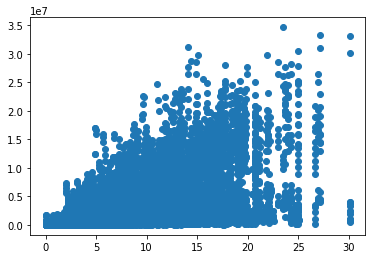

In [13]:
plt.scatter(df['career_PTS'],df['salary'])
plt.show()

4. Which players have got maximum and minimum salary in NBA history?

In [23]:
max_sal = df[(df['salary'] == df['salary'].max())]
(max_sal)


,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,name,position,shoots,weight,league,salary,season,season_end,season_start,team
2888,curryst01,"March 14, 1988","Akron, Ohio",6.6,47.7,43.6,90.5,694,23.8,23.5,...,Stephen Curry,Point Guard,Right,190lb,NBA,34682550,2017-18,2018,2017,Golden State Warriors


In [24]:
min_sal = df[(df['salary'] == df['salary'].min())]
(min_sal)

,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,name,position,shoots,weight,league,salary,season,season_end,season_start,team
11231,sasseja01,"January 13, 1974","Denton, Texas",0.3,41.2,33.3,50,14,7.6,2.1,...,Jason Sasser,Small Forward,Right,225lb,NBA,2706,1999-00,2000,1999,Dallas Mavericks


5. Which draft pick gets paid the highest usually? 

In [15]:
grouped = df.groupby('draft_pick').mean()['salary'].reset_index()
grouped.sort_values('salary',ascending=False)

,draft_pick,salary
33,1st overall,7.410347e+06
56,3rd overall,6.350516e+06
45,2nd overall,5.940986e+06
67,4th overall,5.794093e+06
78,5th overall,5.635164e+06
75,57th overall,4.988501e+06
111,9th overall,4.839262e+06
93,77th overall,4.804848e+06
3,10th overall,4.696275e+06
95,7th overall,4.294990e+06


# Now I will be analysing the data of NBA games played in the last 4 seasons. 

In [16]:
games = pd.read_csv('nba.games.stats.csv')

In [17]:
games.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


1. Which team has scored the highest avg. points per game in the past 4 seasons?

In [18]:
grouped = games.groupby('Team').mean()['TeamPoints'].reset_index()
grouped.sort_values('TeamPoints',ascending=False)

,Team,TeamPoints
9,GSW,113.548780
10,HOU,109.542683
12,LAC,107.219512
5,CLE,107.164634
20,OKC,107.155488
27,TOR,106.301829
7,DEN,106.268293
24,POR,105.375000
1,BOS,104.777439
29,WAS,104.600610


2. Which team has recorded the most wins in the past 4 seasons? 

In [19]:
group = pd.crosstab(games.Team,games.WINorLOSS)
group.sort_values('W',ascending=False)

WINorLOSS,L,W
Team,,
GSW,63,265
SAS,98,230
HOU,111,217
TOR,113,215
CLE,117,211
LAC,126,202
BOS,132,196
OKC,133,195
POR,143,185


3. How many points do the opponents score in a win or loss? 

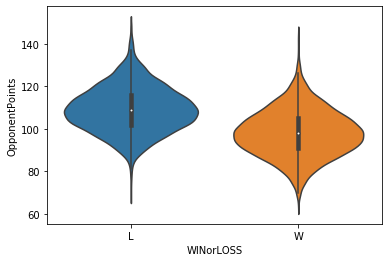

In [20]:
sns.violinplot(games['WINorLOSS'],games['OpponentPoints'])

4. Which team has manageed to give out the least number of points per game?

In [21]:
grouped = games.groupby('Team').mean()['OpponentPoints'].reset_index()
grouped.sort_values('OpponentPoints',ascending=True)

,Team,OpponentPoints
28,UTA,96.853659
26,SAS,96.966463
15,MIA,100.182927
14,MEM,100.484756
27,TOR,101.411585
11,IND,101.750000
8,DET,101.804878
0,ATL,102.292683
1,BOS,102.381098
4,CHO,102.667683


5. Which team has managed to get the most number of home wins and away wins?

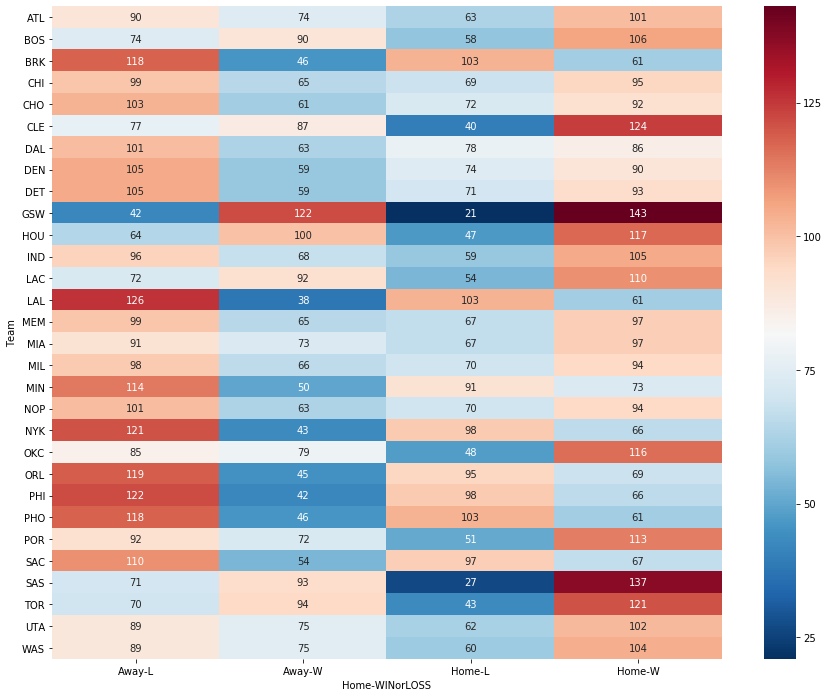

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(pd.crosstab(games.Team,[games.Home,games.WINorLOSS]),cmap='RdBu_r',annot=True,fmt='g')